In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

In [2]:
spy_mo_pricing = yf.download(
    tickers="SPY",
    start=None,
    end="2021-05-05",
    interval="1mo",
)

[*********************100%***********************]  1 of 1 completed


In [3]:
spy_mo_pricing

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.968750,45.125000,42.812500,44.406250,26.160336,5.417600e+06
1993-03-01,44.562500,45.843750,44.218750,45.187500,26.620569,3.019200e+06
1993-03-19,NaN,NaN,NaN,NaN,NaN,NaN
1993-04-01,45.250000,45.250000,43.281250,44.031250,26.061916,2.697200e+06
1993-05-01,44.093750,45.656250,43.843750,45.218750,26.764803,1.808000e+06
...,...,...,...,...,...,...
2021-02-01,373.720001,394.170013,370.380005,380.359985,379.118286,1.307806e+09
2021-03-01,385.589996,398.119995,371.880005,396.329987,395.036163,2.401716e+09
2021-03-19,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
spy_mo_pricing["Date"] = spy_mo_pricing.index
spy_mo_pricing["Month"] = spy_mo_pricing.Date.apply(lambda d: d.month)
spy_yr_pricing = spy_mo_pricing[spy_mo_pricing.Month==12].dropna(how="any")

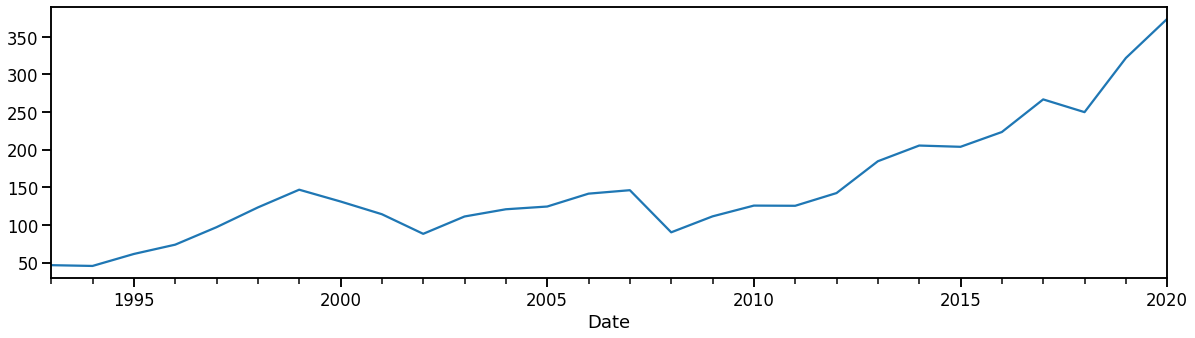

In [6]:
spy_yr_pricing.Close.plot(figsize=(20,5));

In [7]:
spy_yr_pricing["Close_Prev"] = spy_yr_pricing.Close.shift(1)
spy_yr_pricing["Return"] = spy_yr_pricing.Close/spy_yr_pricing.Close_Prev - 1.0
spy_yr_pricing

,Open,High,Low,Close,Adj Close,Volume,Date,Month,Close_Prev,Return
Date,,,,,,,,,,
1993-12-01,46.593750,47.156250,46.375000,46.593750,27.947166,6.128000e+06,1993-12-01,12,NaN,NaN
1994-12-01,45.640625,46.406250,44.687500,45.562500,28.026798,8.568500e+06,1994-12-01,12,46.593750,-0.022133
1995-12-01,60.984375,62.796875,60.578125,61.484375,38.759602,9.816800e+06,1995-12-01,12,45.562500,0.349451
1996-12-01,75.921875,76.578125,71.875000,73.843750,47.539413,3.495280e+07,1996-12-01,12,61.484375,0.201017
1997-12-01,96.218750,99.000000,92.375000,97.062500,63.512390,7.916230e+07,1997-12-01,12,73.843750,0.314431
1998-12-01,116.125000,124.750000,113.750000,123.312500,81.789223,1.560267e+08,1998-12-01,12,97.062500,0.270444
1999-12-01,139.312500,147.562500,139.000000,146.875000,98.550690,1.215293e+08,1999-12-01,12,123.312500,0.191080
2000-12-01,133.187500,139.562500,125.531250,131.187500,88.896049,1.654167e+08,2000-12-01,12,146.875000,-0.106809
2001-12-01,113.650002,118.000000,112.000000,114.300003,78.414055,3.084039e+08,2001-12-01,12,131.187500,-0.128728


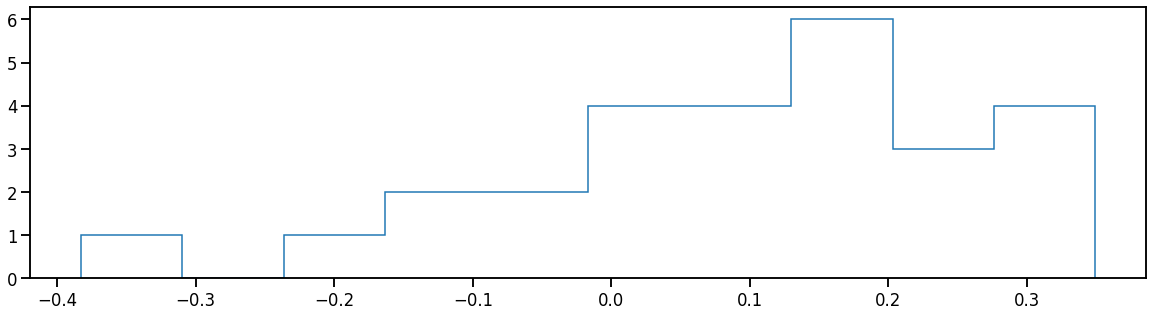

In [8]:
spy_yr_pricing.Return.hist(bins=10, histtype="step", grid=False, figsize=(20,5));

In [11]:
spy_yr_pricing.Return.mean(), spy_yr_pricing.Return.median()

(0.09552809805691534, 0.12840988195524994)

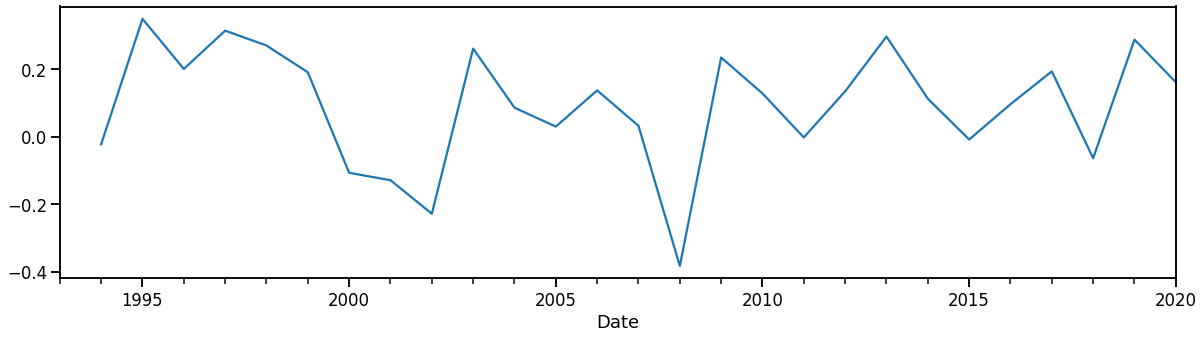

In [10]:
spy_yr_pricing.Return.plot(figsize=(20,5));